#  TITANIC


Hallo und willkommen auf meinem Notebook!

Ich denke, ihr kennt alle die berühmte Geschichte der Titanic, und für diejenigen, die sie nicht kennen, ist das auch nicht schlimm! Ich stelle euch den Link in der Beschreibung zur Verfügung, damit ihr noch mehr wisst!

https://www.histoire-pour-tous.fr/dossiers/4023-vie-et-mort-du-titanic-16.html

Heute wollen wir uns mehr mit den Faktoren beschäftigen, die zum Tod oder Überleben der Reisenden beim Untergang beigetragen haben / haben könnten.

- Erstens werden wir die Daten laden.

- Zweitens werden wir die Daten bereinigen. Dies ist der wichtigste Teil einer Datenanalyseübung, da viele Entscheidungen getroffen werden müssen, ohne die Konsistenz der Daten zu verringern. Entscheidungen wie das Löschen von Daten und die Frage, ob dies nicht erhebliche Auswirkungen auf unsere Forschung haben würde. Hinzufügen von Daten und Begründen ihrer Verwendung, zum Beispiel.

- Drittens folgt eine deskriptive Analyse der Daten.

- Danach werden wir die Daten erforschen, um herauszufinden, wie die Variablen miteinander interagieren.
 
- Wir werden auch eine deskriptive Visualisierung der Daten vornehmen.

- Und schließlich eine Korrelation zwischen den Variablen herstellen, um festzustellen, wie zwei Faktoren zusammengenommen dazu beigetragen haben, ob die Reisenden an diesem Tag überlebt haben oder nicht.

- Maschinelles Lernen

# IMPORT VON BIBLIOTHEKEN

Um bestimmte Manipulationen am Dataset vornehmen zu können, ist es wichtig, Bibliotheken wie z.B. Pandas aufzurufen, die Funktionen oder Methoden enthalten, die zum Lesen und Verarbeiten des Datasets notwendig sind. 

In [2]:
import pandas as pd  

import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.impute import SimpleImputer

# Je nach Bedarf werden im Laufe der Arbeit weitere Bibliotheken hinzugefügt.

# LADEN UND LESEN VON DATEN. 

Hier geht es einfach darum, das Dataset zu laden und zu lesen. Dadurch ist es möglich, sich einen Überblick über die Daten zu verschaffen und zu bestimmen, welche Variable  vorhergesagt werden soll und welche Variablen vorhergesagt werden sollen.

In [3]:
FILENAME_DATASET = "..//assets/data//titanic.csv"  # Hier den Pfad anpassen
raw_data = pd.read_csv(FILENAME_DATASET,sep=",")

raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Erklärung der  getroffenen Predictive Variables : 

PassengerId: Identifikationsnummer des Passagiers

Survived : Zeigt an, ob der Passagier den Untergang überlebt hat oder nicht (0 = Dead 1 = Alive).

Pclass	 : Klasse des Passagiers (1 = First class 2 = Second class 3 = Third class) 

Name ,	Sex	 ,  Age : Bezeichnet jeweils den Namen, das Geschlecht und das Alter des Passagiers.

SibSp	: Number of siblings (Anzahl der Geschwister)

Parch	:  Pergament

Ticket	: Nummer des Tickets wahrscheinlich

Fare	:  Der für das Ticket gezahlte Preis; Typ: Numerisch (Fortlaufend).

Cabin	:  Die Kabinennummer, die dem Passagier zugewiesen wurde; Typ: Text (String).

Embarked :  Der Hafen, in dem der Passagier an Bord geht (C = Cherbourg; Q = Queenstown; S = Southampton);Typ: Text (Kategorisch).

In [4]:
# Mit diesem Befehl können Sie den erwarteten Datentyp für jede Spalte anzeigen lassen.
raw_data.dtypes  

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# VORBEREITUNG DER DATEN 

Hier werden wir konkret die Daten laden, die wir für unsere Analyse für notwendig erachten, d.h. die Variablen, die am ehesten für unsere Studie in Frage kommen. Dann werden wir die Spalten mit fehlenden Daten oder Daten, die nicht der Art der Spalte entsprechen, identifizieren und sie eventuell bereinigen oder im schlimmsten Fall löschen, wenn dies keinen Einfluss auf die Gesamtheit unserer Daten und damit auf die Ergebnisse der Analysen hat.

In [5]:
selected_features= ['Survived', 'Pclass', 'Sex', 'Age', 'Cabin', 'Embarked']

data_for_study = raw_data[selected_features]

data_for_study

,Survived,Pclass,Sex,Age,Cabin,Embarked
0,0,3,male,22.0,NaN,S
1,1,1,female,38.0,C85,C
2,1,3,female,26.0,NaN,S
3,1,1,female,35.0,C123,S
4,0,3,male,35.0,NaN,S
...,...,...,...,...,...,...
886,0,2,male,27.0,NaN,S
887,1,1,female,19.0,B42,S
888,0,3,female,NaN,NaN,S
889,1,1,male,26.0,C148,C


In [6]:
# Dieser Befehl gibt Auskunft über die Art der zu erwartenden Daten, die Anzahl der Spalten und den Platz, den sie in unserem Speicher belegen.
data_for_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Cabin     204 non-null    object 
 5   Embarked  889 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 41.9+ KB


Zunächst wird uns mitgeteilt, dass unser Datenbestand 891 Zeilen und 6 Spalten umfasst. Wir werden dies mit einer Kontrollschleife überprüfen.

In [7]:
"""
Sei: 
 n_spalte: die Anzahl der Spalten
 n_Zeilen: die Anzahl der Zeilen

Wenn die Gesamtzahl der Zeilen tatsächlich 891 und die Anzahl der Spalten 6 beträgt, wird eine Bestätigungsmeldung angezeigt. 
Andernfalls erhalten wir eine Fehlermeldung. 

All dies stellt sicher, dass es kein Datenleck gibt.
 
"""

n_colonne = data_for_study.shape[1]
n_lignes= data_for_study.shape[0]
if n_lignes == 891 and n_colonne == 6:
    print(
        f" Das Dataset hat tatsächlich  {n_lignes} Zeile und   {n_colonne} Spalte. Die Abmessungen sind korrekt.")
else:
    print("Fehler!!! Das Dataset hat nicht die erwarteten Abmessungen.")

 Das Dataset hat tatsächlich  891 Zeile und   6 Spalte. Die Abmessungen sind korrekt.


# ÜBERPRÜFUNG , BEREINIGUNG UND IMPUTATION DER DATEN 


 Die Untersuchung, Bereinigung und Anrechnung von Daten sind wichtige Schritte, da sie die Qualität, Konsistenz und Vollständigkeit der Daten gewährleisten. Dadurch werden genauere und zuverlässigere Analyseergebnisse gewährleistet.

In [8]:
# Wir wollen nun herausfinden, wie viele Werte in jeder Spalte fehlen und welche Typen sie haben. Dazu führen wir den folgenden Befehl aus:

# df.isna().sum() : Liefert die Anzahl der fehlenden Werte für jede Spalte.

print(data_for_study.isna().sum())          


missing_values = data_for_study.isnull().sum()

data_for_study.dtypes

Survived      0
Pclass        0
Sex           0
Age         177
Cabin       687
Embarked      2
dtype: int64


Survived      int64
Pclass        int64
Sex          object
Age         float64
Cabin        object
Embarked     object
dtype: object

Wir sehen, dass die meisten Spalten keine fehlenden Werte enthalten, mit Ausnahme der Variablen „Alter“, die 9% der Daten ausmacht, der Variablen „Kabine“, die 36% der Daten ausmacht und der Variablen Embarked , die 0.2% der Daten ausmacht. 

Da es bei der Variable „Kabine“ eine große Menge an fehlenden Werten gibt, werden wir sie einfach vollständig entfernen und bei den Altersdaten werden wir alle fehlenden Altersdaten durch das Durchschnittsalter ersetzen.

Angesicht der Tatsache ,dass es sehr geringe fehlende Werte bei Embarked gibt, werden wir einfach die zu zwei Zeile löschen, ohne gefahr , dass das Dataset beeinflusst  wird

Was den Datentyp betrifft, so scheint alles korrekt zu sein, mit Ausnahme des Alters, das vom Typ float ist. Da es kein universelles Dezimalalter gibt, ersetzen wir auch den Datentyp der Altersvariablen durch den Datentyp 'Ganzzahl', so dass sie zu Ganzzahlen werden.

In [9]:
data_for_study = data_for_study.drop('Cabin', axis=1)

In [10]:
data_for_study.dropna(subset=['Embarked'], inplace=True)

In [11]:
# Berechnen Sie das Medianalter
median_age = data_for_study['Age'].median()

# Ersetzen der fehlenden Werte durch das Medianalter und Umwandlung in Integer mithilfe der Funktion: „.astype“.
data_for_study['Age'] = data_for_study['Age'].fillna(median_age).astype(int)

In [12]:
data_for_study

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22,S
1,1,1,female,38,C
2,1,3,female,26,S
3,1,1,female,35,S
4,0,3,male,35,S
...,...,...,...,...,...
886,0,2,male,27,S
887,1,1,female,19,S
888,0,3,female,28,S
889,1,1,male,26,C


In [13]:
print(data_for_study.isna().sum())          


valeurs_manquantes = data_for_study.isnull().sum()

data_for_study.dtypes

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64


Survived     int64
Pclass       int64
Sex         object
Age          int32
Embarked    object
dtype: object

Zu diesem Zeitpunkt scheint alles in Ordnung zu sein, was die fehlenden Werte betrifft!

Versuchen wir nun zu überprüfen, ob der Datensatz Nullwerte oder negative Werte enthält. Wir werden dies nur mit numerischen Variablen tun, mit Ausnahme der Variable „Survived“, da sie Nullwerte enthält, die aber eher bedeuten, ob der Passagier gestorben ist oder nicht.

In [14]:
is_Negative_values = data_for_study[(data_for_study['Age'].isnull()) | (~data_for_study['Age'].between(1, 700))]['Age']

# Ausgabe der ungültigen Werte für 'Age'
print("Ungültige Werte für 'Age':")
print(is_Negative_values)

Ungültige Werte für 'Age':
78     0
305    0
469    0
644    0
755    0
803    0
831    0
Name: Age, dtype: int32


Die Variable Alter zeigt an, dass in den Zeilen 78, 305, 469, 644, 755, 803, 831  Werte fehlen.

Diese Werte werden ebenfalls durch das Durchschnittsalter der Bevölkerung ersetzt, und um die Datenqualität zu erhalten, werden diese Werte direkt in einen ganzzahligen Datentyp umgewandelt.

In [15]:
# Berechnen Sie das Durchschnittsalter, indem Sie Nullen ausschließen und auf die nächste ganze Zahl runden.
mean_age = int(data_for_study[data_for_study['Age'] != 0]['Age'].mean())
print(f"Mean Age (excluding zeros): {mean_age}")

#  Ersetzen Sie die Nullen durch das Durchschnittsalter
data_for_study['Age'] = data_for_study['Age'].replace(0, mean_age)

# Die Spalte 'Alter' in eine ganze Zahl umwandeln (falls sie es nicht schon ist)
data_for_study['Age'] = data_for_study['Age'].astype(int)

Mean Age (excluding zeros): 29


überprüfen wir noch einmal, ob es negative Werte oder Null für diese Variable gibt

In [16]:
is_Negative_values = data_for_study[(data_for_study['Age'].isnull()) | (~data_for_study['Age'].between(1, 700))]['Age']

# Ausgabe der ungültigen Werte für 'Age'
print("Ungültige Werte für 'Age':")
print(is_Negative_values)

Ungültige Werte für 'Age':
Series([], Name: Age, dtype: int32)


Das Ergebnis zeigt, dass diese Variable derzeit von guter Qualität und bereit für den nächsten Schritt ist.

In [17]:
is_Negative_values = data_for_study[(data_for_study['Pclass'].isnull()) | (~data_for_study['Pclass'].between(1, 700))]['Pclass'], 

# Ausgabe der ungültigen Werte für 'Pclass'
print("Ungültige Werte für 'Pclass':")
print(is_Negative_values)

Ungültige Werte für 'Pclass':
(Series([], Name: Pclass, dtype: int64),)


Das Ergebnis zeigt, dass auch diese Variable von guter Qualität und bereit für den nächsten Schritt ist.

Nachdem alle Daten in unserem Dataset bereinigt wurden, können wir zum nächsten Schritt übergehen, nämlich der Auswertung und Analyse der Daten.

# ANALYSE UND ERFORSCHUNG VON DATEN

In [18]:
data_for_study

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22,S
1,1,1,female,38,C
2,1,3,female,26,S
3,1,1,female,35,S
4,0,3,male,35,S
...,...,...,...,...,...
886,0,2,male,27,S
887,1,1,female,19,S
888,0,3,female,28,S
889,1,1,male,26,C


Bevor wir mit der Erforschung und Analyse der Daten beginnen, ist es wichtig, unsere Zielvariable zu identifizieren. 
Dabei handelt es sich um die Kernvariable unserer Studie.

Was uns in unserer Studie interessiert, sind die Faktoren, die zum Tod oder zum Überleben der Reisenden beim Schiffbruch beigetragen haben / beitragen könnten (beigetragen haben). 

Aus diesem Grund wird unsere Leitvariable Survived sein. Alle anderen Variablen werden automatisch prädiktiv, d. h. sie könnten in irgendeiner Weise zum Tod oder Überleben der Passagiere beigetragen haben.

Wir können sogar Hypothesen aufstellen, z. B. : 

- (Hypothese 1) : In der Passagierklasse 1 gibt es mehr Tote oder Überlebende als in den beiden anderen Klassen. Ebenso verzeichnet die Passagierklasse 2 mehr Tote oder Überlebende als die Klassen 1 und 3. Dasselbe gilt für Klasse 3.

- (Hypothese 2): Tod oder Überleben hängt vom Geschlecht ab.

- (Hypothese 3): Tod oder Überleben hängt vom Alter ab.

- (Hypothese 4) : Die Wege, die das Schiff nimmt, sind ebenfalls eine Ursache für den Untergang und damit für den Tod.

## DESKRIPTIVE STATISTIK

In [19]:
# Berechnung der deskriptiven Statistik aller Variablen
data_for_study.describe(include="all").round(2)

,Survived,Pclass,Sex,Age,Embarked
count,889.00,889.00,889,889.00,889
unique,NaN,NaN,2,NaN,3
top,NaN,NaN,male,NaN,S
freq,NaN,NaN,577,NaN,644
mean,0.38,2.31,NaN,29.53,NaN
std,0.49,0.83,NaN,12.73,NaN
min,0.00,1.00,NaN,1.00,NaN
25%,0.00,2.00,NaN,22.00,NaN
50%,0.00,3.00,NaN,28.00,NaN
75%,1.00,3.00,NaN,35.00,NaN


Die Variablen „Sex“ und „Embarked“ weisen auf den ersten Blick keine beschreibende Statistik (NaN) auf, was völlig normal ist, da beide Variablen Daten enthalten, die vom Typ „Object“ sind; in anderen Programmiersprachen würde man sagen, vom Typ „String“.

Trotzdem können wir daraus interessante Informationen ziehen. 

--------------------------------------------------------------------------------------------------------------------------------------------
Was die Variable „Sex“ betrifft, so zeigen die deskriptiven Statistiken, dass an diesem Tag mehr Männer als Frauen auf dem Schiff anwesend waren. Genauer gesagt waren 577 Männer auf dem Boot anwesend.

--------------------------------------------------------------------------------------------------------------------------------------------
In Bezug auf die Variable „Embarked“ geht aus den beschreibenden Statistiken hervor, dass die meisten Passagiere aus der Stadt „Southampton“ kamen, die angesichts der Bevölkerungszahl von 644 Personen, die dort an Bord gegangen waren, wahrscheinlich der Ort der Einschiffung war. 

--------------------------------------------------------------------------------------------------------------------------------------------
In Bezug auf die Variable „Survived“ wurden 889 Passagiere registriert. Die beschreibenden Statistiken zeigen, dass bei 25% der Passagiere oder weniger keine Überlebende des Schiffbruchs registriert wurde. Bei 50% der Passagiere oder weniger wurde ebenfalls keine Überlebende des Schiffbruchs registriert. 
Nur bei 75% oder weniger der Passagiere werden Überlebende registriert.  Das heißt, mehr als die Hälfte der Passagiere sind tot.

--------------------------------------------------------------------------------------------------------------------------------------------

Für die Variable „Age“ wurden 889 Altersangaben erfasst. Das Durchschnittsalter der Passagiere betrug 29 Jahre. Die deskriptiven Statistiken zeigen, dass der am wenigsten alte Passagier (Mindestalter) 1 Jahr und der älteste Passagier (Höchstalter) 80 Jahre alt ist. 25% der Passagiere waren 22 Jahre alt oder jünger, 50% der Passagiere waren 28 Jahre alt oder jünger und 75% der Passagiere waren 35 Jahre alt oder jünger. Die Bevölkerung war eher jung.

--------------------------------------------------------------------------------------------------------------------------------------------

In Bezug auf die Variable „Pclass“ (Passager_class) ergab die beschreibende Statistik, dass die Mittelklasse die Klasse Nummer 2 war.  Außerdem werden wir nicht von Min- und Max-Klassen sprechen, da es nur drei gab. Außerdem wurde für 25% der Passagiere die Klasse 2 registriert. Für 50 bis 75% der Bevölkerung wurde die Klasse 3 gebucht.

## EXPLORATION UND VISUALIESIERUNG

### EXPLORATION
 

hier geht es darum, in die Tiefe unserer Studie zu gehen

**Survived**

In [20]:
# Wir können auch zusätzliche Statistiken berechnen.
data_for_study.groupby("Survived", observed=True, dropna=False)[
    "Survived"].agg(["count", "mean", "median", "std"])

,count,mean,median,std
Survived,,,,
0,549,0.0,0.0,0.0
1,340,1.0,1.0,0.0


Von 889 Reisenden verzeichnen wir genau 549 Verstorbene bei 340 Überlebenden

**Pclass**

In [21]:
data_for_study.groupby("Pclass", observed=True, dropna=False)[
    "Pclass"].agg(["count", "mean", "median", "std"])

,count,mean,median,std
Pclass,,,,
1,214,1.0,1.0,0.0
2,184,2.0,2.0,0.0
3,491,3.0,3.0,0.0


Es gab genau 214 Passagiere, die die Klasse 1 buchten, während 184 Passagiere die Klasse 2 buchten und 491 Passagiere die Klasse 3 buchten.

**Sex**

In [22]:
stats_by_sex = data_for_study.groupby("Sex", observed=True, dropna=False)["Pclass"].agg(["count", "mean", "median", "std"])
stats_by_sex

,count,mean,median,std
Sex,,,,
female,312,2.166667,2.0,0.854971
male,577,2.389948,3.0,0.813580


Es gibt genau 312 Frauen und 577 Männer, die an diesem Tag an Bord der Titanic gegangen sind.

**Embarqued**

In [23]:
stats_by_embarked = data_for_study.groupby("Embarked", observed=True, dropna=False)["Pclass"].agg(["count", "mean", "median", "std"])

stats_by_embarked

,count,mean,median,std
Embarked,,,,
C,168,1.886905,1.0,0.944100
Q,77,2.909091,3.0,0.369274
S,644,2.350932,3.0,0.789402


Es zeigt sich, dass 168 Personen in Cherbourg, 77 in Queenstown und 644 in Southampton an Bord gingen.

**Age**

In [24]:

# Erstelle Altersintervalle von 10 Jahren
age_bins = pd.cut(data_for_study['Age'], bins=range(0, 81, 10))

# Gruppiere nach diesen Altersintervallen und berechne die Statistiken.
age_group_stats = data_for_study.groupby(age_bins)['Age'].agg(['count', 'mean', 'median', 'std'])

# Zeige die Ergebnisse
age_group_stats

C:\Users\ngoum\AppData\Local\Temp\ipykernel_22580\3127277756.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = data_for_study.groupby(age_bins)['Age'].agg(['count', 'mean', 'median', 'std'])


,count,mean,median,std
Age,,,,
"(0, 10]",57,4.701754,4.0,2.865839
"(10, 20]",116,17.336207,18.0,2.202544
"(20, 30]",415,26.612048,28.0,2.542651
"(30, 40]",154,35.142857,35.0,2.870696
"(40, 50]",84,45.476190,45.0,2.881082
"(50, 60]",42,54.880952,54.0,2.989432
"(60, 70]",17,64.352941,64.0,3.101233
"(70, 80]",4,74.000000,72.5,4.242641


Die Mehrheit der Passagiere der Titanic waren junge Erwachsene, insbesondere in der Altersgruppe der 20- bis 30-Jährigen, die die meisten Passagiere (415) zählte. Das Alter variiert in der Regel gleichmäßig in jedem Intervall, mit einer Tendenz zur Normalität in der Altersverteilung, mit Ausnahme der Altersgruppe 70-80 Jahre, in der es nur 4 Passagiere gibt.

#### Versuchen wir jetzt , die predictive Variable zusammen mit der Leitvariable **Survived** zu interagieren

**Survived** Vs **Pclass**

In [25]:
survival_by_class = data_for_study.groupby(['Survived', 'Pclass']).size().unstack()

survival_by_class

Pclass,1,2,3
Survived,,,
0,80,97,372
1,134,87,119


- Von 214 registrierten Personen der Klasse 1 gab es 80 Todesfälle und 134 Überlebende 
- Von 184 registrierten Personen der Klasse 2 gab es 97 Todesfälle und 87 Überlebende 
- Von 491 registrierten Personen der Klasse 3 gab es 372 Todesfälle und 119 Überlebende.


Insgesamt wurden in der Klasse 3 genauso viele Personen registriert, was zu einer sehr hohen Zahl von Todesfällen führte.

**Survived( Fokus auf Dead)** Vs **Sex**

In [26]:
# Verstorbene Passagiere filtern (Survived = 0)
deceased_passengers = data_for_study[data_for_study['Survived'] == 0]

# Nach Geschlecht gruppieren und die Anzahl der Todesfälle zählen
deceased_by_sex = deceased_passengers.groupby('Sex').size()
# Zeige die Ergebnisse
print(deceased_by_sex)

Sex
female     81
male      468
dtype: int64


Von den 549 Verstorbenen sind genau 81 weiblich und 468 männlich. Es gibt jedoch mehr Todesfälle im männlichen Geschlecht.

**Survived( Fokus auf Survival)** Vs **Sex**

In [27]:
# Verstorbene Passagiere filtern (Survived = 1)
survival_passengers = data_for_study[data_for_study['Survived'] == 1]

# Nach Geschlecht gruppieren und die Anzahl der Todesfälle zählen
survival_by_sex = survival_passengers.groupby('Sex').size()

# Zeige die Ergebnisse
print(survival_by_sex )

Sex
female    231
male      109
dtype: int64


Von den 340 überlebenden Personen sind genau 231 weiblich und 109 männlich. Allerdings gibt es mehr Überlebende im weiblichen Geschlecht.

Diese Ergebnisse können das Ergebnis von Rettungsprioritaten sein oder mit anderen Faktoren wie dem Alter oder physiologischen Faktoren wie dem Stoffwechsel des Menschen zusammenhangen.

**Survived(Fokus auf Dead)** Vs **Age**

In [28]:
deaths_by_age_group = data_for_study[data_for_study['Survived'] == 0].groupby(age_bins)['Survived'].count()

deaths_by_age_group

C:\Users\ngoum\AppData\Local\Temp\ipykernel_22580\3808452350.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deaths_by_age_group = data_for_study[data_for_study['Survived'] == 0].groupby(age_bins)['Survived'].count()


Age
(0, 10]      26
(10, 20]     72
(20, 30]    272
(30, 40]     86
(40, 50]     51
(50, 60]     25
(60, 70]     14
(70, 80]      3
Name: Survived, dtype: int64

(0, 10] Jahre: 26 Todesfälle 
Zusammenfassung: Von den 57 Kindern im Alter von 0 bis 10 Jahren starben 26.

(10, 20] Jahre: 72 Todesfälle 
Zusammenfassung: Von den 116 Jugendlichen im Alter von 10 bis 20 Jahren kamen 72 ums Leben.

(20, 30] Jahre: 272 Todesfälle 
Zusammenfassung: Die Altersgruppe der 20- bis 30-Jährigen hatte mit 272 Todesfällen die meisten Verluste zu beklagen. Dies deutet darauf hin, dass die Mehrheit der Opfer in dieser Altersgruppe zu finden war.

(30, 40] Jahre: 86 Todesfälle 
Zusammenfassung: Von den 154 Passagieren im Alter zwischen 30 und 40 Jahren starben 86.

(40, 50] Jahre: 51 Todesfälle 
Zusammenfassung: Von den 84 Personen im Alter von 40 bis 50 Jahren starben 51.

(50, 60] Jahre: 25 Todesfälle 
Zusammenfassung: Von den 42 Personen im Alter von 50 bis 60 Jahren kamen 25 ums Leben.

(60, 70] Jahre: 14 Todesfälle 
Zusammenfassung: Von den 17 Personen im Alter von 60 bis 70 Jahren starben 14.

(70, 80] Jahre: 3 Todesfälle 
Zusammenfassung: Von den 4 Passagieren im Alter von 70 bis 80 Jahren starben 3 und somit nur 1 Überlebender.

Das Ergebnis zeigt, dass die Mehrheit der Todesfälle jüngere Passagiere betraf, insbesondere solche im Alter von 20 bis 30 Jahren. In den höheren Altersgruppen (60 Jahre und älter) ist die Zahl der Todesfälle im Verhältnis zur Zahl der Reisenden signifikant.




**Survived (Fokus survival)** Vs **Age**

In [29]:
survival_by_age_group = data_for_study[data_for_study['Survived'] == 1].groupby(age_bins)['Survived'].count()
survival_by_age_group

C:\Users\ngoum\AppData\Local\Temp\ipykernel_22580\3408964680.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = data_for_study[data_for_study['Survived'] == 1].groupby(age_bins)['Survived'].count()


Age
(0, 10]      31
(10, 20]     44
(20, 30]    143
(30, 40]     68
(40, 50]     33
(50, 60]     17
(60, 70]      3
(70, 80]      1
Name: Survived, dtype: int64

Das Ergebnis zeigt, dass die Mehrheit der Überlebenden auch jüngere Passagiere sind, insbesondere im Alter zwischen 20 und 30 Jahren. Die höheren Altersgruppen (60 Jahre und älter) verzeichnen ebenfalls eine signifikante Anzahl an Todesfällen, die im Verhältnis zur Anzahl der Registrierungen stehen.

## VISUALISIERUNG

In diesem Teil des Projekts geht es darum,  die Daten grafisch darzustellen, um die Ergebnisse besser lesen und interpretieren zu können. 

C:\Users\ngoum\AppData\Local\Temp\ipykernel_22580\489910715.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=data_for_study, palette="Set3")


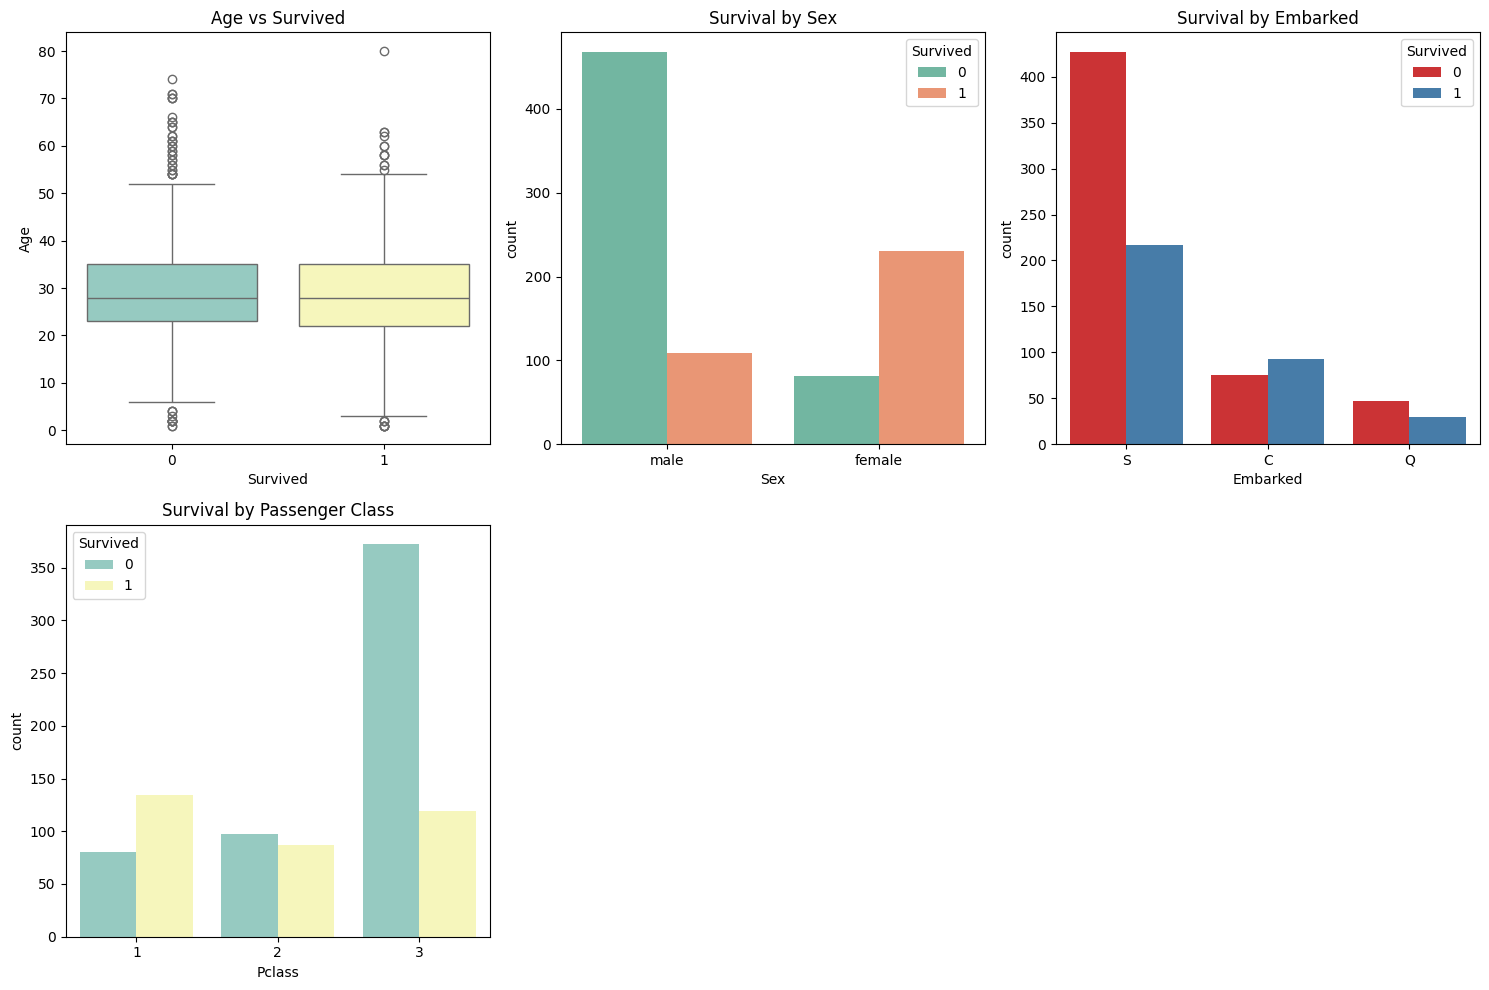

In [34]:

# Définir la taille de la figure
plt.figure(figsize=(15, 10))

# Graphique 1: Boxplot pour l'Age
plt.subplot(2, 3, 1)
sns.boxplot(x='Survived', y='Age', data=data_for_study, palette="Set3")
plt.title('Age vs Survived')

# Graphique 2: Countplot pour le Sexe
plt.subplot(2, 3, 2)
sns.countplot(x='Sex', hue='Survived', data=data_for_study, palette="Set2")
plt.title('Survival by Sex')

# Graphique 3: Countplot pour Embarked
plt.subplot(2, 3, 3)
sns.countplot(x='Embarked', hue='Survived', data=data_for_study, palette="Set1")
plt.title('Survival by Embarked')

# Graphique 4: Countplot pour Pclass
plt.subplot(2, 3, 4)
sns.countplot(x='Pclass', hue='Survived', data=data_for_study, palette="Set3")
plt.title('Survival by Passenger Class')



# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()

# Afficher les graphiques
plt.show()


# Analyse und Interpretation der Grafiken :

### Grafik „Age vs Survived“ (Boxplot) :

Diese Grafik zeigt die Altersverteilung zwischen Überlebenden (1) und Nicht-Überlebenden (0).

a) Nicht-Überlebende (0) :

- Median (50% Quartil) : Das Medianalter der Nichtüberlebenden scheint bei etwa 28 Jahren zu liegen.

-Unteres Quartil (Q1 - 25%): Das untere Quartil, in dem 25% der Nichtüberlebenden jünger sind, liegt bei etwa 22 Jahren.

-Oberes Quartil (Q3 - 75%): Das obere Quartil, in dem 75% der Nichtüberlebenden jünger sind, ist ca. 37 Jahre alt.

Interquartile Range (IQR): Der Abstand zwischen Q1 und Q3 (IQR) beträgt 15 Jahre (37 - 22). Dies zeigt, dass die Mehrheit der Nicht-Überlebenden zwischen 22 und 37 Jahre alt war.

die hohe Konzentration von Punkten auf beiden Seiten der Quartile / außerhalb der Kästchen zeigt einfach, dass es unter den Nicht-Überlebenden auch viele Todesfälle im Alter von 0 bis 5 Jahren und im Alter von etwa 51 bis 72 Jahren gibt. 


b) Überlebende (1) :

-Median (Quartil 50%) : Das Medianalter der Überlebenden liegt ebenfalls bei etwa 28 Jahren.

-Unteres Quartil (Q1 - 25%): Das untere Quartil der Überlebenden liegt bei etwa 21 Jahren.

-Oberes Quartil (Q3 - 75%): Das Obere Quartil ist ca. 38 Jahre alt.

IQR (Interquartile Range): Der IQR der Überlebenden liegt bei 17 Jahren (38 - 21).

die hohe Konzentration von Punkten auf beiden Seiten der Quartile / außerhalb der Kästchen zeigt einfach, dass es auch 2 Überlebende im Alter von 0 bis ca. 3 Jahren und mehrere andere Überlebende im Alter von ca. 50 bis ca. 60 Jahren und nur 1 Überlebender im Alter von 80 Jahren gibt.

### Survival by Sex

Frauen :

Überlebende (1): Etwa 230 Frauen haben überlebt.

Nicht-Überlebende (0): Ca. 80 Frauen haben nicht überlebt.

Überlebensrate: Die Überlebensrate der Frauen ist dementsprechend hoch, etwa 74 % der Frauen überlebten.
Männer:

Überlebende (1): Etwa 110 Männer haben überlebt.

Nicht-Überlebende (0): Rund 470 Männer haben nicht überlebt.

Überlebensrate: Die Überlebensrate der Männer war viel niedriger, mit nur etwa 19% Überlebenden.

**Schlussfolgerung**: 
Es ist klar, dass Frauen eine viel höhere Überlebenschance hatten als Männer. Frauen waren während der Evakuierung besser geschützt.
Insbesondere Männer hatten eine sehr geringe Überlebenschance und eine extrem hohe Sterblichkeitsrate.

### Survival by Passenger Class (Überleben nach Passagierklasse)

Die soziale Klasse hatte einen erheblichen Einfluss auf die Überlebenschancen, wobei die Passagiere der ersten Klasse eine wesentlich höhere Überlebenschance hatten als die zweite und dritte. 

Die Passagiere der dritten Klasse waren am stärksten gefährdet und hatten eine wesentlich höhere Sterblichkeitsrate.

### Allgemeines Fazit :


Die detaillierten Statistiken bestätigen, dass die Überlebenschancen von mehreren Faktoren abhingen :

Geschlecht: Frauen hatten einen klaren Vorteil, ihre Überlebensrate war viel höher als die der Männer.

Passagiere  Klasse: Passagiere der ersten Klasse hatten eine wesentlich höhere Überlebenschance als Passagiere der dritten Klasse. 

Einschiffungshafen: Diejenigen, die in Cherbourg an Bord gingen, hatten bessere Überlebenschancen als diejenigen, die in Southampton oder Queenstown an Bord gingen.

Die Quartile und Mittelwerte zeigen wichtige Trends, wobei die Überlebenden im Durchschnitt etwas älter waren als die Nicht-Überlebenden, aber der Schlüsselfaktor bleibt der Einfluss von Klasse und Geschlecht.


# KORRELATION

Auf dieser Ebene werden wir jede Vorhersagevariable mit der Mastervariable „Survived“ interagieren lassen, nicht nur um die Ergebnisse der oben durchgeführten Analyse bestätigen zu können, sondern auch um herauszufinden, inwieweit eine Variable an diesem Tag zum Überleben oder zum Tod der an Bord befindlichen Personen geführt hätte.